<a href="https://colab.research.google.com/github/patriani/RNN_LSTM_Tesla_stock/blob/main/ELT575_Semana3_ES119663.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import pandas as pd

# Primeira configuração da rede
- **Modelo**: RNN configurado com apenas uma célula de LSTM, que por sua vez possui 50 unidades ocultas.
- **Análise**: O modelo representa um erro médio muito pequeno em comparação com a magnitude e a variação dos preços de fechamento (coluna 'Close' do dataset) observados. Nota-se que apesar de os erros (RMSE) serem muito baixos, observa-se que o poder de generalização do modelo pode não ser tão escalável devido o fato do erro de treino ter sido aproximadamente 100 vezes menor que o de teste.

  - **Raíz do Erro Médio Quadrático para Treino: 0.008**
  - **Raíz do Erro Médio Quadrático para Teste: 0.108**

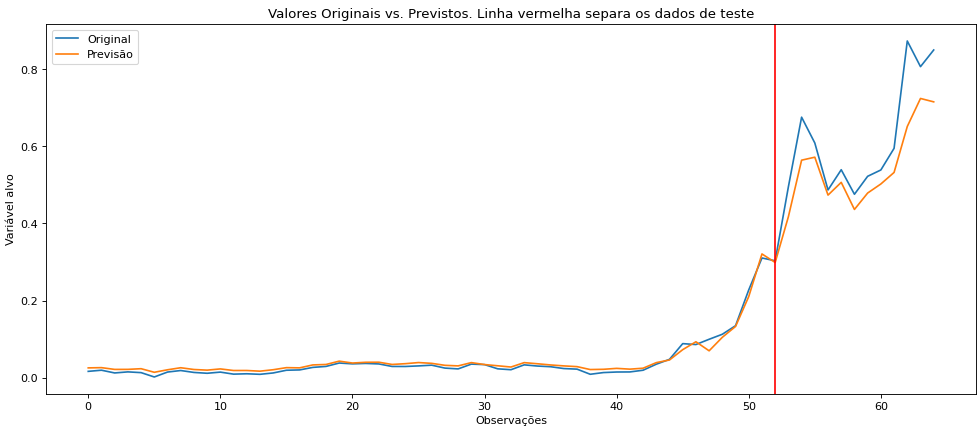


In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
def load_and_prepare_data():

  tesla_stock = 'https://raw.githubusercontent.com/patriani/RNN_LSTM_Tesla_stock/main/tesla_stock_2015_2022.csv'
  df = read_csv(tesla_stock)

  # Only the column 'Open' will be used as independent variables and 'Close' is the column of the dependent variables.
  #df_XY=pd.DataFrame(df, columns=['Open','Close'])
  opening_prices = df['Open'].values

  # Reshape of the target data
  opening_prices_scaled = scaler.fit_transform(opening_prices.reshape(-1, 1))

  # Split into train and test data (80% to train and 20% to test)
  train_size = int(len(opening_prices_scaled) * 0.8)
  train_data = opening_prices_scaled[:train_size]
  test_data = opening_prices_scaled[train_size:]

  return opening_prices,train_data,test_data

opening_prices,train_data,test_data = load_and_prepare_data()

In [22]:
# Prepare the input X and target Y for temporal analysis

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(sequence_length, len(data)):
        sequences.append(data[i-sequence_length:i])
        labels.append(data[i])
    return np.array(sequences), np.array(labels)


time_steps = 50

# Prepating the train data frame
trainX, trainY = create_sequences(train_data, time_steps)

# Prepating the test data frame
testX, testY = create_sequences(test_data, time_steps)

In [23]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=32, verbose=2)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 - 2s - 38ms/step - loss: 0.0011 - val_loss: 0.0060
Epoch 2/20
40/40 - 0s - 10ms/step - loss: 1.2850e-04 - val_loss: 0.0062
Epoch 3/20
40/40 - 0s - 7ms/step - loss: 1.0825e-04 - val_loss: 0.0104
Epoch 4/20
40/40 - 0s - 7ms/step - loss: 1.2003e-04 - val_loss: 0.0096
Epoch 5/20
40/40 - 0s - 7ms/step - loss: 1.0391e-04 - val_loss: 0.0067
Epoch 6/20
40/40 - 0s - 8ms/step - loss: 1.0639e-04 - val_loss: 0.0104
Epoch 7/20
40/40 - 0s - 8ms/step - loss: 1.0208e-04 - val_loss: 0.0091
Epoch 8/20
40/40 - 0s - 7ms/step - loss: 8.5750e-05 - val_loss: 0.0069
Epoch 9/20
40/40 - 1s - 16ms/step - loss: 8.8039e-05 - val_loss: 0.0083
Epoch 10/20
40/40 - 0s - 7ms/step - loss: 8.7417e-05 - val_loss: 0.0076
Epoch 11/20
40/40 - 0s - 7ms/step - loss: 8.1171e-05 - val_loss: 0.0095
Epoch 12/20
40/40 - 0s - 8ms/step - loss: 8.5767e-05 - val_loss: 0.0098
Epoch 13/20
40/40 - 0s - 7ms/step - loss: 7.7866e-05 - val_loss: 0.0103
Epoch 14/20
40/40 - 0s - 7ms/step - loss: 7.3787e-05 - val_loss: 0.0103
Epoch 15/20
4

In [24]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Raíz do Erro Médio Quadrático para Treino: 0.008
Raíz do Erro Médio Quadrático para Teste: 0.084


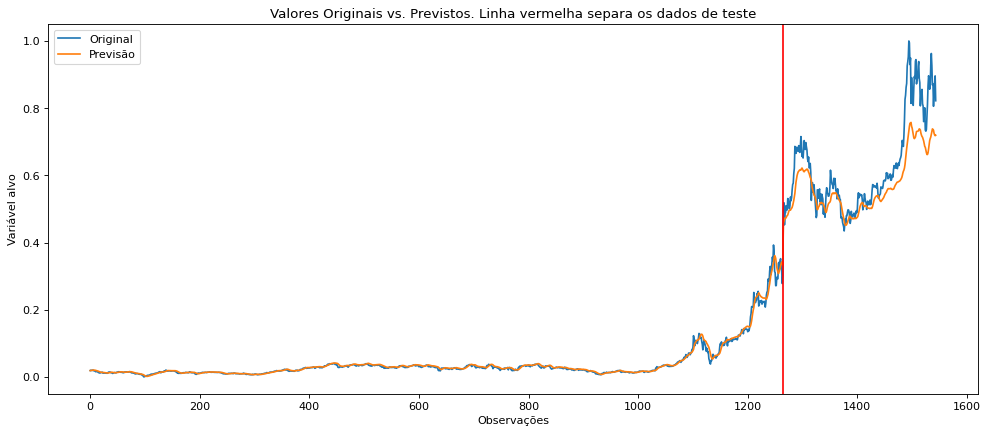

In [25]:

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Variável alvo')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')

plot_result(trainY, testY, train_predict, test_predict)

# Segunda análise
- **Modelo**: baseado no primeiro experimento, com adição de uma camada LSTM
- **Análise**: A adição e conexão de uma camada LSTM já contribuiu levemente na generalização do modelo, assim como aumentou a precisão dele devido a redução do RMSE:
  - **Raíz do Erro Médio Quadrático para Treino: 0.007**
  - **Raíz do Erro Médio Quadrático para Teste: 0.090**

  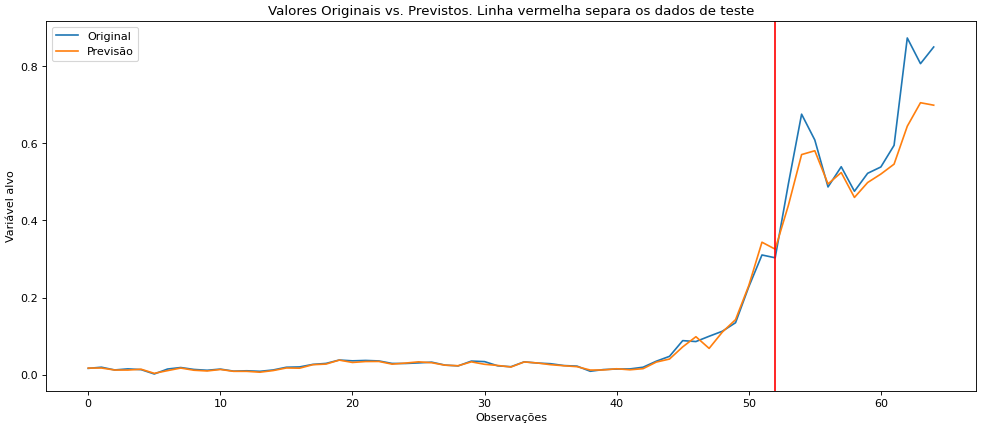

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 - 2s - 58ms/step - loss: 9.6241e-04 - val_loss: 0.0140
Epoch 2/20
40/40 - 1s - 22ms/step - loss: 1.1727e-04 - val_loss: 0.0062
Epoch 3/20
40/40 - 1s - 15ms/step - loss: 1.1554e-04 - val_loss: 0.0081
Epoch 4/20
40/40 - 1s - 15ms/step - loss: 1.1820e-04 - val_loss: 0.0149
Epoch 5/20
40/40 - 1s - 16ms/step - loss: 1.1818e-04 - val_loss: 0.0064
Epoch 6/20
40/40 - 0s - 9ms/step - loss: 1.0352e-04 - val_loss: 0.0085
Epoch 7/20
40/40 - 1s - 16ms/step - loss: 9.9868e-05 - val_loss: 0.0089
Epoch 8/20
40/40 - 1s - 16ms/step - loss: 9.6024e-05 - val_loss: 0.0141
Epoch 9/20
40/40 - 0s - 9ms/step - loss: 1.1917e-04 - val_loss: 0.0083
Epoch 10/20
40/40 - 1s - 15ms/step - loss: 8.3775e-05 - val_loss: 0.0109
Epoch 11/20
40/40 - 0s - 9ms/step - loss: 1.0564e-04 - val_loss: 0.0047
Epoch 12/20
40/40 - 0s - 9ms/step - loss: 8.0274e-05 - val_loss: 0.0083
Epoch 13/20
40/40 - 0s - 9ms/step - loss: 8.3696e-05 - val_loss: 0.0096
Epoch 14/20
40/40 - 1s - 15ms/step - loss: 7.7805e-05 - val_loss: 0.0085
Epo

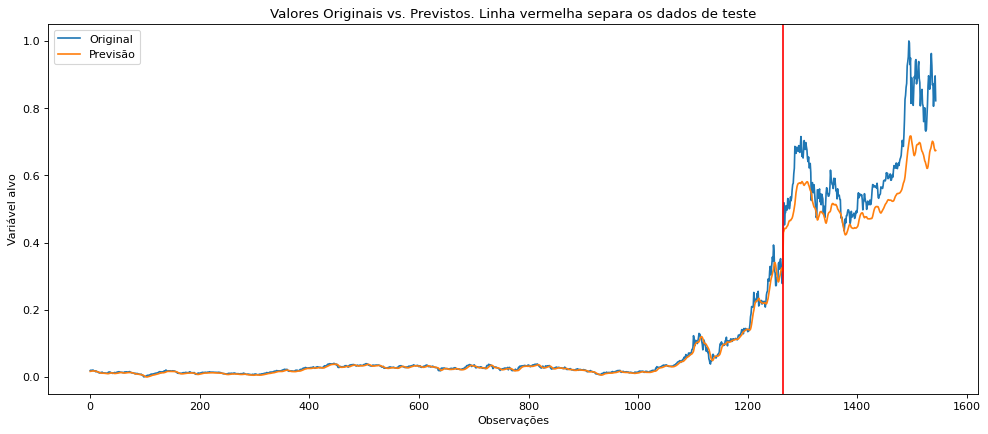

In [26]:

df_XY_02,train_data_02,test_data_02 = load_and_prepare_data()

# Same value of the previous test
time_steps = 50

# Prepating the train data frame
trainX_02, trainY_02 = create_sequences(train_data_02, time_steps)

# Prepating the test data frame
testX_02, testY_02 = create_sequences(test_data_02, time_steps)

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0],return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[1]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_02 = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model_02.fit(trainX_02, trainY_02, validation_data=(testX_02, testY_02), epochs=20, batch_size=32, verbose=2)


# make predictions
train_predict_02 = model_02.predict(trainX_02)
test_predict_02 = model_02.predict(testX_02)
# Mean square error
print_error(trainY_02, testY_02, train_predict_02, test_predict_02)


# predicting
predicted_02 = model_02.predict(trainX_02)
predicted_prices_02 = scaler.inverse_transform(predicted_02)
actual_prices_02 = scaler.inverse_transform(testY.reshape(-1, 1))

# Plot the result
plot_result(trainY_02, testY_02, train_predict_02, test_predict_02)

# Terceira análise
- **Modelo:** baseado no modelo anterior, tendo camadas de Dropout de 20% incluídas
- **Análise:** Observa-se que as métricas de erro não foram consideravelmente menores do que o exemplo anterior apresentou. Presumi-se que a técnica de dropout não contribui diretamente na melhora de performance de modelos pequenos, mas que é uma técnica promissora para redes mais profundas (com mais camdas), assim como será observado na próxima análise (quarta análise).
  - **Raíz do Erro Médio Quadrático para Treino: 0.008**
  -** Raíz do Erro Médio Quadrático para Teste: 0.085**

  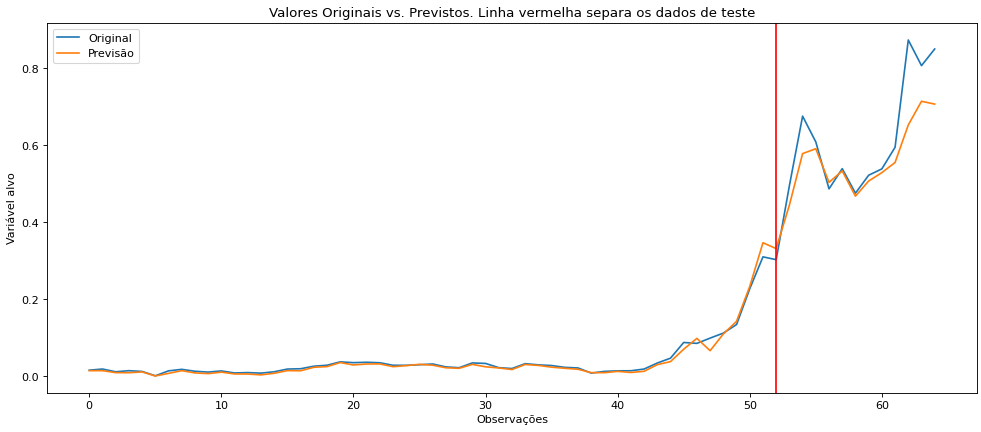


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 - 2s - 61ms/step - loss: 9.0174e-04 - val_loss: 0.0109
Epoch 2/20
40/40 - 1s - 23ms/step - loss: 1.9605e-04 - val_loss: 0.0058
Epoch 3/20
40/40 - 1s - 15ms/step - loss: 2.2688e-04 - val_loss: 0.0074
Epoch 4/20
40/40 - 0s - 9ms/step - loss: 1.6579e-04 - val_loss: 0.0075
Epoch 5/20
40/40 - 0s - 10ms/step - loss: 1.4838e-04 - val_loss: 0.0056
Epoch 6/20
40/40 - 1s - 15ms/step - loss: 1.6009e-04 - val_loss: 0.0111
Epoch 7/20
40/40 - 1s - 16ms/step - loss: 1.3075e-04 - val_loss: 0.0070
Epoch 8/20
40/40 - 1s - 15ms/step - loss: 1.6029e-04 - val_loss: 0.0115
Epoch 9/20
40/40 - 0s - 10ms/step - loss: 1.5243e-04 - val_loss: 0.0057
Epoch 10/20
40/40 - 0s - 10ms/step - loss: 1.4291e-04 - val_loss: 0.0140
Epoch 11/20
40/40 - 0s - 10ms/step - loss: 1.5678e-04 - val_loss: 0.0144
Epoch 12/20
40/40 - 1s - 20ms/step - loss: 1.2881e-04 - val_loss: 0.0171
Epoch 13/20
40/40 - 1s - 29ms/step - loss: 1.3246e-04 - val_loss: 0.0067
Epoch 14/20
40/40 - 0s - 10ms/step - loss: 9.9833e-05 - val_loss: 0.0060

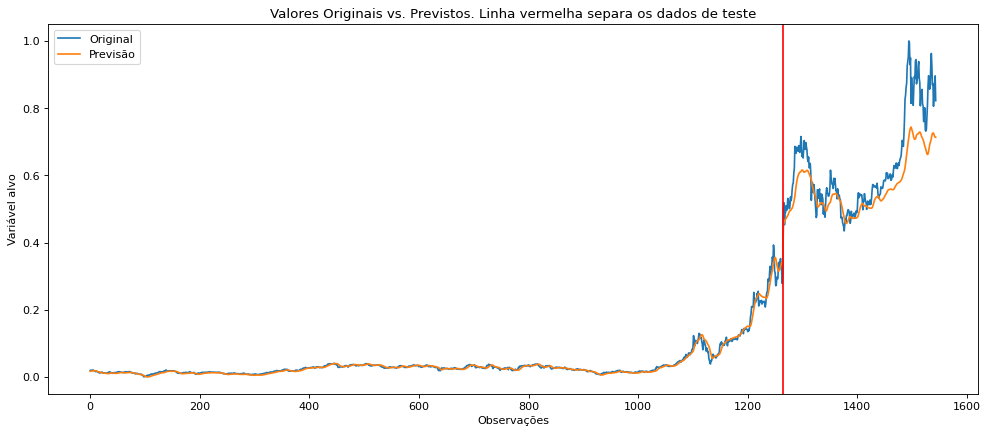

In [27]:

df_XY_03,train_data_03,test_data_03 = load_and_prepare_data()

# Same value of the previous test
time_steps = 50

# Prepating the train data frame
trainX_03, trainY_03 = create_sequences(train_data_03, time_steps)

# Prepating the test data frame
testX_03, testY_03 = create_sequences(test_data_03, time_steps)

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0],return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, activation=activation[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_03 = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model_03.fit(trainX_03, trainY_03, validation_data=(testX_03, testY_03), epochs=20, batch_size=32, verbose=2)


# make predictions
train_predict_03 = model_03.predict(trainX_03)
test_predict_03 = model_03.predict(testX_03)
# Mean square error
print_error(trainY_03, testY_03, train_predict_03, test_predict_03)

# Plot the result
plot_result(trainY_03, testY_03, train_predict_03, test_predict_03)

# Quarta análise
- modelo04, com 4 blocos de LSTM

In [30]:

df_XY_04,train_data_04,test_data_04 = load_and_prepare_data()

# Same value of the previous test
time_steps = 50

# Prepating the train data frame
trainX_04, trainY_04 = create_sequences(train_data_04, time_steps)

# Prepating the test data frame
testX_04, testY_04 = create_sequences(test_data_04, time_steps)

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    # Parameter return_sequences=True => SimpleRNN layer returns sequences so that the output has the same number of time steps as the input, making it compatible with the second SimpleRNN layer
    model.add(LSTM(hidden_units, input_shape=input_shape,activation=activation[0],return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[1],return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[1],return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_04 = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
history = model_04.fit(trainX_04, trainY_04, validation_data=(testX_04, testY_04), epochs=20, batch_size=32, verbose=2)


# make predictions
train_predicted_04 = model_04.predict(trainX_04)
test_predict_04 = model_04.predict(testX_04)

# Mean square error
print_error(trainX_04, testX_04, train_predicted_04, test_predict_04)

# Plot the result
plot_result(trainX_04, testX_04, train_predicted_04, test_predict_04)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 - 5s - 113ms/step - loss: 9.3704e-04 - val_loss: 0.0136
Epoch 2/20
40/40 - 1s - 18ms/step - loss: 5.4776e-04 - val_loss: 0.0167
Epoch 3/20
40/40 - 1s - 15ms/step - loss: 2.4602e-04 - val_loss: 0.0095
Epoch 4/20
40/40 - 1s - 15ms/step - loss: 2.8252e-04 - val_loss: 0.0138
Epoch 5/20
40/40 - 1s - 13ms/step - loss: 2.5202e-04 - val_loss: 0.0087
Epoch 6/20
40/40 - 1s - 15ms/step - loss: 2.8905e-04 - val_loss: 0.0301
Epoch 7/20
40/40 - 1s - 14ms/step - loss: 2.5336e-04 - val_loss: 0.0189
Epoch 8/20
40/40 - 1s - 13ms/step - loss: 1.7852e-04 - val_loss: 0.0090
Epoch 9/20
40/40 - 1s - 17ms/step - loss: 2.3310e-04 - val_loss: 0.0159
Epoch 10/20
40/40 - 1s - 15ms/step - loss: 1.9833e-04 - val_loss: 0.0178
Epoch 11/20
40/40 - 1s - 13ms/step - loss: 2.1248e-04 - val_loss: 0.0104
Epoch 12/20
40/40 - 1s - 14ms/step - loss: 1.8059e-04 - val_loss: 0.0162
Epoch 13/20
40/40 - 1s - 15ms/step - loss: 1.7263e-04 - val_loss: 0.0146
Epoch 14/20
40/40 - 1s - 14ms/step - loss: 1.5039e-04 - val_loss: 0.01

ValueError: Found array with dim 3. None expected <= 2.